In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = '/content/drive/MyDrive/NLP/vaers_analysis'
data_dir = os.path.join(base_dir, 'data')

In [4]:
vaers_data = pd.read_csv(os.path.join(data_dir, 'vaers_data.csv'))
vaers_data['symptoms'] = vaers_data['symptoms'].apply(literal_eval)
vaers_data['ordered_symptoms'] = vaers_data['ordered_symptoms'].apply(literal_eval)
vaers_data.head()

,vaers_id,year,vax_type,vax_manu,symptom_text,symptoms,ordered_symptoms,report_length,num_symptoms
0,905937,2020,COVID19,MODERNA,PT WITH KNOWN H/O SEVERE ALLERGIC REACTION - A...,"[Breath sounds abnormal, Cough, Headache, Rash...","[Throat irritation, Cough, Rash, Stridor, Brea...",377,7
1,905962,2020,COVID19,MODERNA,approximately 30 minutes after receiving the v...,"[Chest discomfort, Dyspnoea, Heart rate increa...","[Heart rate increased, Chest discomfort, Dyspn...",82,3
2,905986,2020,COVID19,MODERNA,"Severe swelling, hard lump, hot to touch, seve...","[Induration, Mass, Pruritus, Skin warm, Swelling]","[Swelling, Induration, Skin warm, Mass, Pruritus]",9,5
3,906235,2020,COVID19,MODERNA,"Immediately after receiving the vaccine, I fel...","[Erythema, Flushing, Immediate post-injection ...","[Immediate post-injection reaction, Paraesthes...",47,5
4,906315,2020,COVID19,MODERNA,At 35min post vaccine patient noted with redne...,"[Ear swelling, Erythema, Lip swelling]","[Erythema, Ear swelling, Lip swelling]",37,3


In [5]:
vaers_data.describe()

,vaers_id,year,report_length,num_symptoms
count,2.634220e+05,263422.000000,263422.000000,263422.000000
mean,1.550236e+06,2021.195136,92.544818,4.498713
std,5.215871e+05,0.516298,109.671475,2.522826
min,9.059370e+05,2020.000000,1.000000,2.000000
25%,1.097623e+06,2021.000000,17.000000,3.000000
50%,1.458807e+06,2021.000000,47.000000,4.000000
75%,1.886445e+06,2021.000000,140.000000,6.000000
max,2.787667e+06,2024.000000,2267.000000,20.000000


In [6]:
def get_n_most_frequent_symptoms(symptoms_lists, n=100):

    symptoms_frequency = {}
    flattened_symptoms_list = [symptom for symptoms in symptoms_lists for symptom in symptoms]

    for symptom in flattened_symptoms_list:
        if symptom in symptoms_frequency:
            symptoms_frequency[symptom] += 1
        else:
            symptoms_frequency[symptom] = 1

    sorted_symptoms = sorted(symptoms_frequency.items(), key= lambda x: x[1], reverse=True)

    return sorted_symptoms[:n]

In [7]:
symptoms_list = list(vaers_data['symptoms'])
top_100_symptoms = get_n_most_frequent_symptoms(symptoms_list)

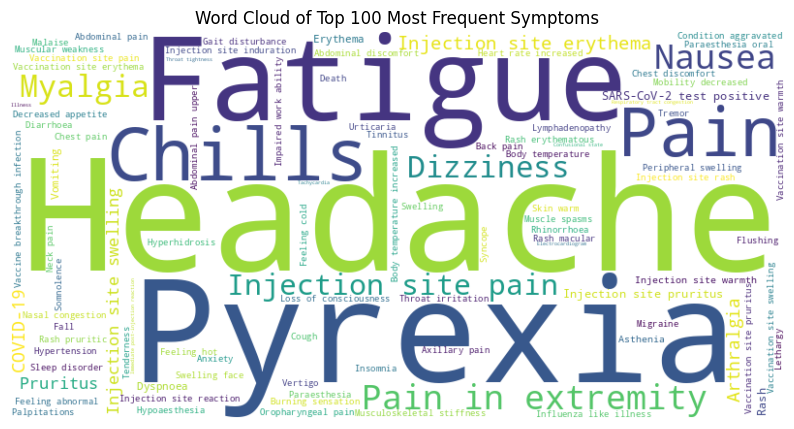

In [8]:
# Convert the frequency data into a format suitable for a word cloud (dict)
word_freq = dict(top_100_symptoms)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Top 100 Most Frequent Symptoms')
plt.show()

<ipython-input-9-d1bd7a1d3e13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df, y='Symptom', x='Frequency', palette="viridis")


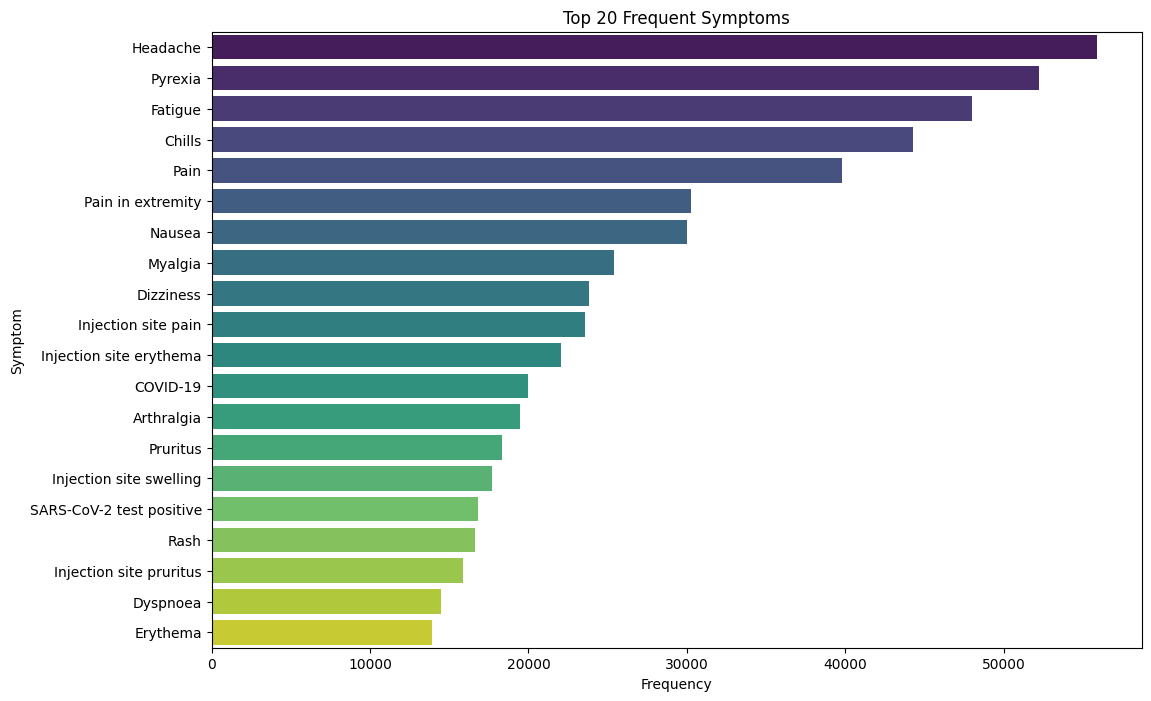

In [9]:
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Symptom', 'Frequency'])
word_freq_df = word_freq_df.nlargest(20, 'Frequency')  # Select the top 100 symptoms

# Plotting the vertical bar chart for the 100 most frequent symptoms
plt.figure(figsize=(12, 8))
sns.barplot(data=word_freq_df, y='Symptom', x='Frequency', palette="viridis")

# Adding labels and title
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.title("Top 20 Frequent Symptoms")
plt.show()

<ipython-input-10-0e7c32b0f67e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vaers_data, x='num_symptom_str', palette="viridis", order=order)


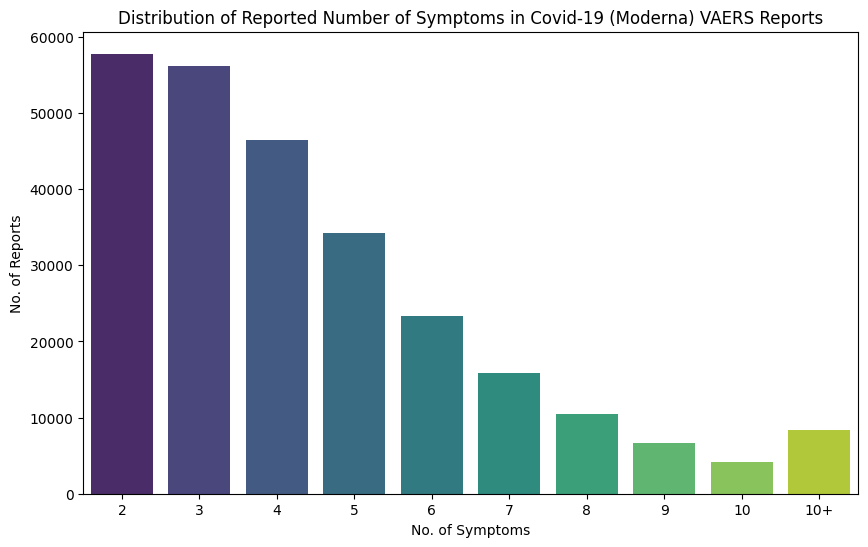

In [10]:
vaers_data['num_symptom_str'] = vaers_data['num_symptoms'].apply(lambda x: '10+' if x > 10 else str(x))

# Define the correct order for the x-axis labels, including '10+' at the end
order = [str(i) for i in range(2, 11)] + ['10+']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=vaers_data, x='num_symptom_str', palette="viridis", order=order)

# Adding labels and title
plt.xlabel("No. of Symptoms")
plt.ylabel("No. of Reports")
plt.title("Distribution of Reported Number of Symptoms in Covid-19 (Moderna) VAERS Reports")
plt.xticks(rotation=0)
plt.show()

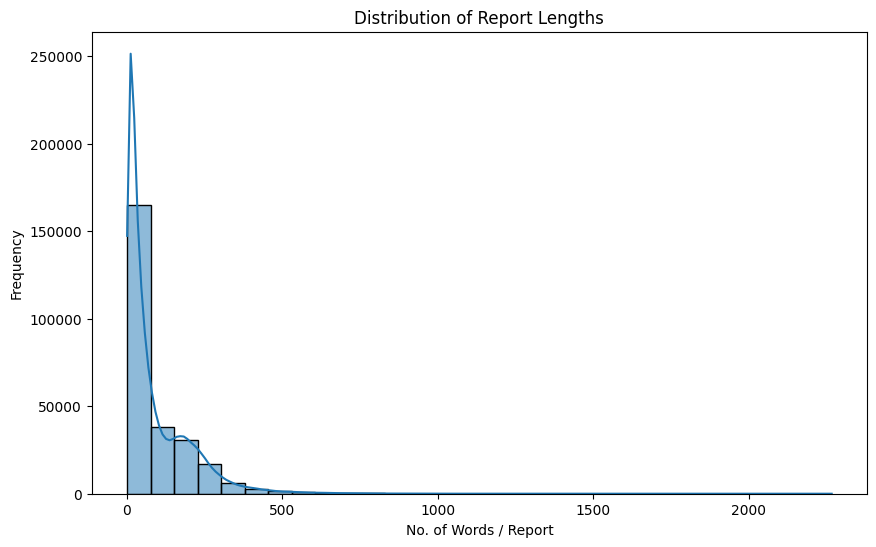

In [11]:
## Histogram of Report Lengths
plt.figure(figsize=(10, 6))
sns.histplot(vaers_data['report_length'], bins=30, kde=True)
plt.xlabel("No. of Words / Report")
plt.ylabel("Frequency")
plt.title("Distribution of Report Lengths")
plt.show()

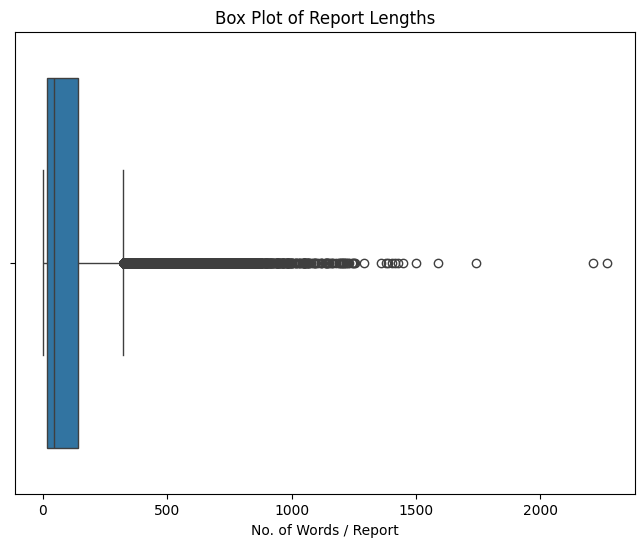

In [12]:
# Box Plot of Report Lengths
plt.figure(figsize=(8, 6))
sns.boxplot(x=vaers_data['report_length'])
plt.xlabel("No. of Words / Report")
plt.title("Box Plot of Report Lengths")
plt.show()

<ipython-input-13-f9f3573e4111>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(data=vaers_data, x='length_category', palette="viridis")
<ipython-input-13-f9f3573e4111>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(custom_labels)


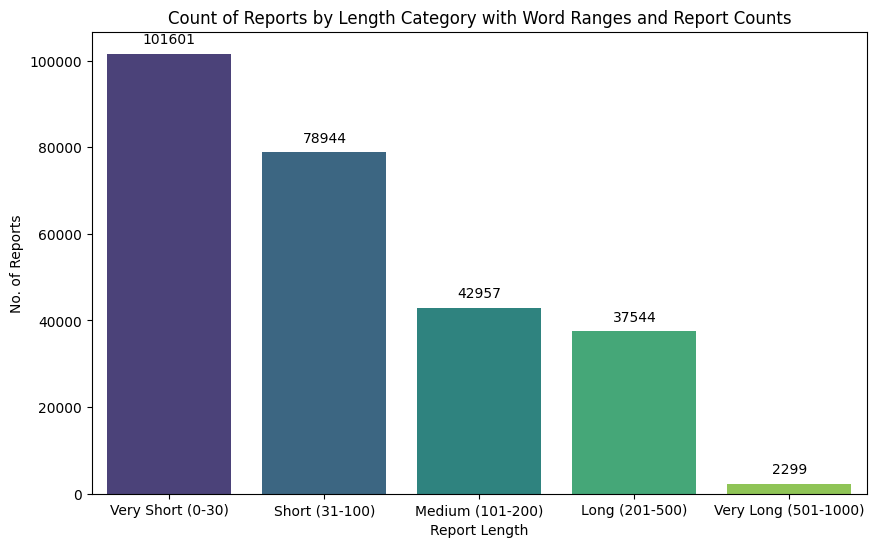

In [13]:
# Define the word count ranges and labels
bins = [0, 30, 100, 200, 500, 1000]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Create the categorized length column with ranges in the labels
vaers_data['length_category'] = pd.cut(vaers_data['report_length'], bins=bins, labels=labels)

# Define the custom labels with ranges for display on the x-axis
custom_labels = ['Very Short (0-30)', 'Short (31-100)', 'Medium (101-200)', 'Long (201-500)', 'Very Long (501-1000)']

# Plotting the bar chart with custom x-axis labels and count annotations
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=vaers_data, x='length_category', palette="viridis")

# Set custom x-axis labels including word ranges
custom_labels = ['Very Short (0-30)', 'Short (31-100)', 'Medium (101-200)', 'Long (201-500)', 'Very Long (501-1000)']
bar_plot.set_xticklabels(custom_labels)

# Adding annotations on top of each bar with the total number of reports
category_counts = vaers_data['length_category'].value_counts(sort=False).values
for p, count in zip(bar_plot.patches, category_counts):
    bar_plot.annotate(f'{int(count)}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at center of each bar
                      ha='center', va='bottom',  # Center alignment
                      xytext=(0, 5), textcoords='offset points')  # Offset by 5 points above bar

# Adding labels and title
plt.xlabel("Report Length")
plt.ylabel("No. of Reports")
plt.title("Count of Reports by Length Category with Word Ranges and Report Counts")
plt.show()